In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta

In [ ]:
#df = pd.read_csv('conjunto_de_datos_ENCUESTA_SOBRE_DIVERSIDAD_Y_TALENTO_LGBT_EN_MEXICO.csv')
#https://adilmexico.com/wp-content/uploads/2018/08/ResultadosEncuestaDivyTalLGBTADIL2018-1.pdf


# Cadenas de Markov

Preparación de datos:

Si la "Necesidad de Trabajo" es una variable binaria (0 o 1), entonces puedes usarla como tu estado.
Codifica las variables categóricas (como "Nivel Educativo" y "Área de Formación") en números para que puedas incluirlas en el modelo. Puedes usar técnicas de codificación, como one-hot encoding, para hacerlo.

Definir los estados:

Definimos los estados.  tendríamos dos estados: "No necesita trabajo" (0) y "Necesita trabajo" (1).
Modelar transiciones:

Para modelar las transiciones entre estados, necesitamos calcular las probabilidades de transición. observando cuántas veces ocurren las transiciones de un estado a otro en los datos. Por ejemplo, cuántas veces una persona cambia de "No necesita trabajo" a "Necesita trabajo" y viceversa.
Estimar probabilidades de transición:

Calcula las probabilidades de transición entre los estados.

Utilizar la matriz de transición y el estado actual para calcular la probabilidad del siguiente estado.
Evaluar el modelo:

Evalúamos la calidad del modelo de cadena de Markov utilizando medidas como la matriz de confusión, precisión, sensibilidad y especificidad.

In [ ]:
!pip install numpy pandas networkx


In [ ]:
import pandas as pd  # Importa la biblioteca pandas para trabajar con datos tabulares
import numpy as np   # Importa la biblioteca numpy para cálculos numéricos
from sklearn.preprocessing import LabelEncoder  # Importa LabelEncoder para codificar variables categóricas
from sklearn.metrics import confusion_matrix  # Importa confusion_matrix para evaluar el rendimiento del modelo
from sklearn.model_selection import train_test_split  # Importa train_test_split para dividir los datos en entrenamiento y prueba
from sklearn.ensemble import RandomForestClassifier  # Importa RandomForestClassifier para entrenar un modelo de clasificación


# Leer tus datos en un DataFrame de pandas
data = pd.read_csv('conjunto_de_datos_ENCUESTA_SOBRE_DIVERSIDAD_Y_TALENTO_LGBT_EN_MEXICO.csv')

# Preprocesamiento de datos
# Codificar variables categóricas y tratar los valores faltantes
label_encoders = {}
for column in ["Nivel Educativo", "Área de Formación"]:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])
data.fillna("Sin informacion", inplace=True)

# Definir estados
states = [0, 1]

# Crear una matriz de transición (ejemplo: usando un modelo de clasificación)
X = data[["Edad", "Nivel Educativo", "Área de Formación"]]
y = data["Necesidad de Trabajo"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)

# Normalizamos la matriz de confusión para obtener la matriz de transición
transition_matrix = confusion / confusion.sum(axis=1)[:, np.newaxis]

# Imprimir la matriz de transición
print("Matriz de Transición:")
print(transition_matrix)


Matriz de Transición:
[[0.6744186  0.3255814 ]
 [0.56321839 0.43678161]]


In [ ]:

# Definimos la matriz de transición. En este caso, se utiliza la matriz de transición proporcionada.
transition_matrix = np.array([[0.6744186, 0.3255814], [0.56321839, 0.43678161]])

# Establece el número máximo de iteraciones (max_iterations) para la convergencia.
#Si el algoritmo no converge en este número de iteraciones, se detendrá.
max_iterations = 1000

# Define el valor de convergencia (epsilon). Este valor se utiliza
#para verificar si la distribución de estados ha convergido.
#Si las diferencias entre distribuciones sucesivas son menores que epsilon, se considera que ha convergido.
epsilon = 1e-6

# Calcula el número de estados en la matriz de transición.
n_states = len(transition_matrix)

# Inicializa una distribución de estados (stationary_distribution).
#En este caso, se inicia con una distribución uniforme de estados.
stationary_distribution = np.ones(n_states) / n_states

# Realiza iteraciones hasta la convergencia. En cada iteración, multiplica
#la distribución actual por la matriz de transición para obtener una nueva distribución.
#Luego, verifica si la nueva distribución ha convergido. Si ha convergido,
#se detienen las iteraciones. Si no ha convergido, se actualiza la distribución
#actual con la nueva y se repite el proceso.

for _ in range(max_iterations):
    new_distribution = np.dot(stationary_distribution, transition_matrix)

    if np.all(np.isclose(new_distribution, stationary_distribution, atol=epsilon)):
        break

    stationary_distribution = new_distribution

# Imprime la matriz estacionaria una vez que el algoritmo haya convergido.
#La matriz estacionaria representa la distribución de estados en equilibrio a largo plazo.
print("Matriz Estacionaria:")
print(stationary_distribution)


Matriz Estacionaria:
[0.63368193 0.36631807]


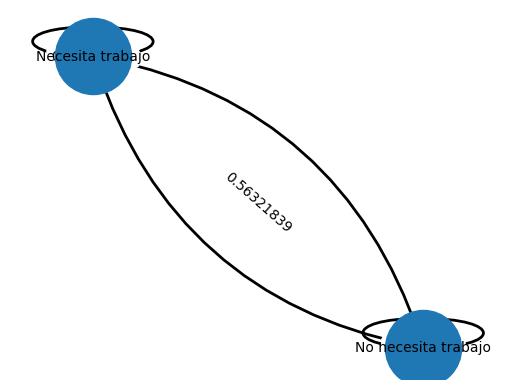

In [ ]:
import networkx as nx  # Importa la biblioteca networkx para crear y visualizar grafos


# Se importan las bibliotecas necesarias, como numpy para cálculos numéricos,
#networkx para trabajar con grafos y matplotlib para dibujar el gráfico.

# Define la matriz de transición (usamos lo que hemos calculado)
transition_matrix = np.array([[0.6744186, 0.3255814], [0.56321839, 0.43678161]])

# Se define la matriz de transición que representa las probabilidades de transición entre estados.

# Etiquetas de los estados
state_labels = {0: "No necesita trabajo", 1: "Necesita trabajo"}

# Se asignan etiquetas a los estados para que el gráfico sea más legible.

# Crear un grafo dirigido con NetworkX
G = nx.DiGraph()  # Crea un grafo dirigido para representar la cadena de Markov.

# Se crea un grafo dirigido (DiGraph) utilizando NetworkX para representar la cadena de Markov.

for i in range(len(transition_matrix)):
    for j in range(len(transition_matrix[i])):
        prob = transition_matrix[i, j]

        # Agregar una arista al grafo solo si la probabilidad es mayor que cero
        if prob > 0:
            G.add_edge(state_labels[i], state_labels[j], weight=prob)

# Se recorren las probabilidades en la matriz de transición y se agregan aristas
#al grafo solo si la probabilidad es mayor que cero.

# Dibujar el grafo
pos = nx.spring_layout(G)  # Determina la posición de los nodos en el gráfico
labels = nx.get_edge_attributes(G, 'weight')  # Obtiene las etiquetas de las aristas (probabilidades)

# Se determina la disposición de los nodos en el gráfico utilizando spring_layout de NetworkX.

# Dibuja los nodos del grafo con un tamaño específico y agrega etiquetas a los nodos
nx.draw_networkx_nodes(G, pos, node_size=3000)

# Dibuja las aristas del grafo con flechas que indican la dirección de las transiciones y agrega etiquetas de probabilidades a las aristas
nx.draw_networkx_edges(G, pos, width=2, arrowstyle='->', connectionstyle='arc3,rad=0.3')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10, font_family='sans-serif')

# Oculta los ejes del gráfico para que sea más limpio
plt.axis('off')

# Muestra el diagrama de transición de estados
plt.show()


In [ ]:
# Definimos la matriz de transición P. Esta matriz representa
#las probabilidades de transición entre estados en la cadena de Markov.
P = np.array([[0.6744186, 0.3255814],
              [0.56321839, 0.43678161]])

# Definimos el estado inicial X0. Es el estado a partir del cual deseamos hacer la predicción.
# En este caso, hemos definido un estado inicial que representa "No necesita trabajo."
X0 = np.array([1, 0])

# Calculamos P elevado a la potencia 3 (P^3). Esto representa
#la matriz de transición después de 3 pasos en la cadena de Markov.
P_3 = np.linalg.matrix_power(P, 3)

# Calculamos X3 multiplicando el estado inicial X0 por P^3.
#Esto nos da la predicción del estado después de 3 pasos en la cadena de Markov.
X3 = np.dot(X0, P_3)

# Finalmente, imprimimos la predicción del estado después de 3 pasos.
print(f"Predicción del estado en 3 pasos: {X3}")


Predicción del estado en 3 pasos: [0.63418791 0.36581209]


## -- Predicción del estado en 3 pasos: [0.63418791 0.36581209]," representa la predicción de la distribución de probabilidades de los estados después de 3 pasos en la cadena de Markov, partiendo de un estado inicial donde la probabilidad de estar en "No necesita trabajo" es aproximadamente 0.6342 y la probabilidad de estar en "Necesita trabajo" es aproximadamente 0.3658.

## -- En otras palabras, después de 3 pasos en la cadena de Markov, la predicción indica que la probabilidad de estar en el estado "No necesita trabajo" es del 63.42%, mientras que la probabilidad de estar en el estado "Necesita trabajo" es del 36.58%. Estos valores representan la distribución de probabilidades de los estados en ese punto en el tiempo. La predicción se basa en las probabilidades de transición entre estados en la matriz de transición y el estado inicial.

# Datos de violencia

In [ ]:
import re

# Definir las características del conjunto de datos
años = [2013, 2014, 2015, 2016, 2017]
n_registros = [84, 65, 61, 76, 95]

generos = ['Gay/Homosexual', 'Lesbiana/Mujer homosexual', 'Mujer trans', 'Hombre bisexual', 'Otro']
frecuencias_genero = [158, 31, 209, 6, 5]

intervalos_edad = ['0-17 años', 'Jóvenes 18-29 años', 'Adultos 30-59 años', 'Personas mayores 60+ años', 'S/D']
frecuencias_edad = [8, 123, 158, 16, 76]

ocupaciones = ['Estudiante', 'Artista o artesano', 'Empleado(a) público o privado', 'Profesor(a)', 'Comerciante',
               'Estilista y peluquería', 'Empresario(a)', 'Trabajador(a) sexual', 'Desocupado(a)', 'Medios de comunicación',
               'Otro*', 'S/D']
frecuencias_ocupacion = [11, 15, 32, 11, 14, 42, 5, 5, 3, 5, 24, 178]

agresiones = ['Agresión física', 'Hostigamiento y acoso', 'Actos de discriminación', 'Extorsión', 'Otro', 'Sin dato']
frecuencias_agresiones = [1, 4, 1, 3, 4, 368]

tipos_crimen = ['Crimen de odio', 'Crimen pasional', 'Crimen organizado', 'Asalto o robo', 'Homicidio simple', 'S/D']
frecuencias_tipos_crimen = [17, 45, 20, 61, 15, 215]

# Crear un DataFrame con valores aleatorios si es necesario
data = {'Año': [], 'Género': [], 'Edad': [], 'Ocupación': [], 'Agresiones': [], 'Tipo Crimen': []}

for año, n in zip(años, n_registros):
    data['Año'].extend([año] * n)
    data['Género'].extend(random.choices(generos, weights=frecuencias_genero, k=n))
    data['Edad'].extend(random.choices(intervalos_edad, weights=frecuencias_edad, k=n))
    data['Ocupación'].extend(random.choices(ocupaciones, weights=frecuencias_ocupacion, k=n))
    data['Agresiones'].extend(random.choices(agresiones, weights=frecuencias_agresiones, k=n))
    data['Tipo Crimen'].extend(random.choices(tipos_crimen, weights=frecuencias_tipos_crimen, k=n))

# Crear el DataFrame
df = pd.DataFrame(data)

# Asignar edades específicas dentro de los intervalos
for i, row in df.iterrows():
    intervalo = row['Edad']
    if intervalo != 'S/D':
        numeros = re.findall(r'\d+', intervalo)
        if len(numeros) == 2:
            edad_especifica = random.randint(int(numeros[0]), int(numeros[1]))
        else:
            edad_especifica = int(numeros[0])
        df.at[i, 'Edad'] = edad_especifica

In [ ]:
df

,AÃ±o,GÃ©nero,Edad,OcupaciÃ³n,Agresiones,Tipo Crimen,Fecha
0,2013,Gay/Homosexual,24,Estilista y peluquerÃ­a,Sin dato,S/D,2018-10-07
1,2013,Mujer trans,S/D,S/D,Sin dato,S/D,2018-10-10
2,2013,Otro,S/D,S/D,Sin dato,S/D,2018-01-01
3,2013,Gay/Homosexual,S/D,S/D,Sin dato,S/D,2018-12-07
4,2013,Mujer trans,S/D,S/D,Sin dato,Crimen de odio,2018-06-15
...,...,...,...,...,...,...,...
829,2022,Otro,33,S/D,Sin informacion,Crimen organizado,2018-10-16
830,2022,Muxe,S/D,Trabajador(a) sexual,Sin informacion,S/D,2018-07-20
831,2022,Muxe,56,Empleado(a) pÃºblico o privado,Sin informacion,S/D,2018-01-13
832,2022,S/D,S/D,S/D,Sin informacion,S/D,2018-03-01


In [ ]:
# Guardar el DataFrame en un archivo CSV
df.to_csv('conjunto_datos_encuesta_asesinatos_LGTB.csv', index=False)

print("Conjunto de datos creado y guardado como 'conjunto_datos_encuesta.csv'.")

Conjunto de datos creado y guardado como 'conjunto_datos_encuesta.csv'.


In [ ]:
df = pd.read_csv('conjunto_datos_encuesta_asesinatos_LGTB.csv')

In [ ]:
df

,AÃ±o,GÃ©nero,Edad,OcupaciÃ³n,Agresiones,Tipo Crimen,Fecha
0,2013,Gay/Homosexual,24,Estilista y peluquerÃ­a,Sin dato,S/D,2018-10-07
1,2013,Mujer trans,S/D,S/D,Sin dato,S/D,2018-10-10
2,2013,Otro,S/D,S/D,Sin dato,S/D,2018-01-01
3,2013,Gay/Homosexual,S/D,S/D,Sin dato,S/D,2018-12-07
4,2013,Mujer trans,S/D,S/D,Sin dato,Crimen de odio,2018-06-15
...,...,...,...,...,...,...,...
829,2022,Otro,33,S/D,Sin informacion,Crimen organizado,2018-10-16
830,2022,Muxe,S/D,Trabajador(a) sexual,Sin informacion,S/D,2018-07-20
831,2022,Muxe,56,Empleado(a) pÃºblico o privado,Sin informacion,S/D,2018-01-13
832,2022,S/D,S/D,S/D,Sin informacion,S/D,2018-03-01


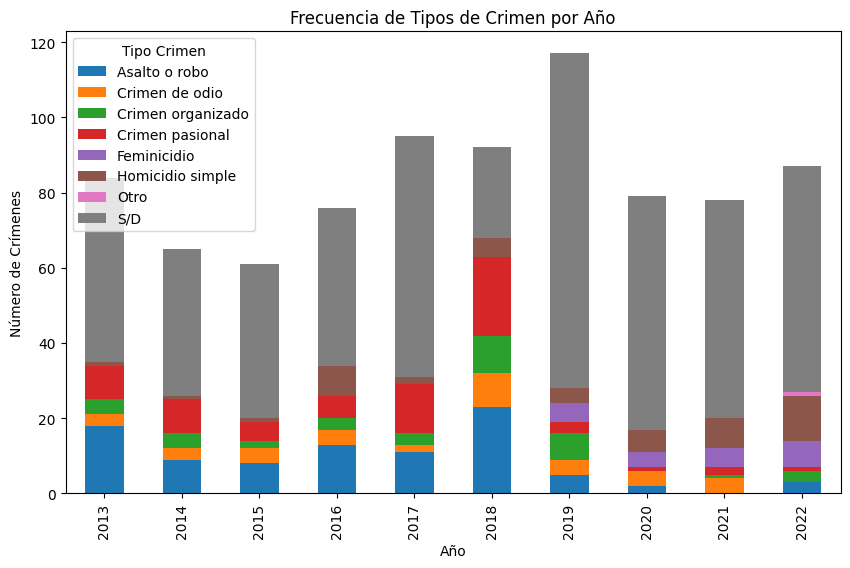

In [ ]:
# Contar la frecuencia de cada tipo de crimen por año
crime_counts = df.groupby(['AÃ±o', 'Tipo Crimen']).size().unstack(fill_value=0)

# Visualizar la frecuencia de cada tipo de crimen por año
crime_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Frecuencia de Tipos de Crimen por Año')
plt.xlabel('Año')
plt.ylabel('Número de Crímenes')
plt.legend(title='Tipo Crimen')
plt.show()

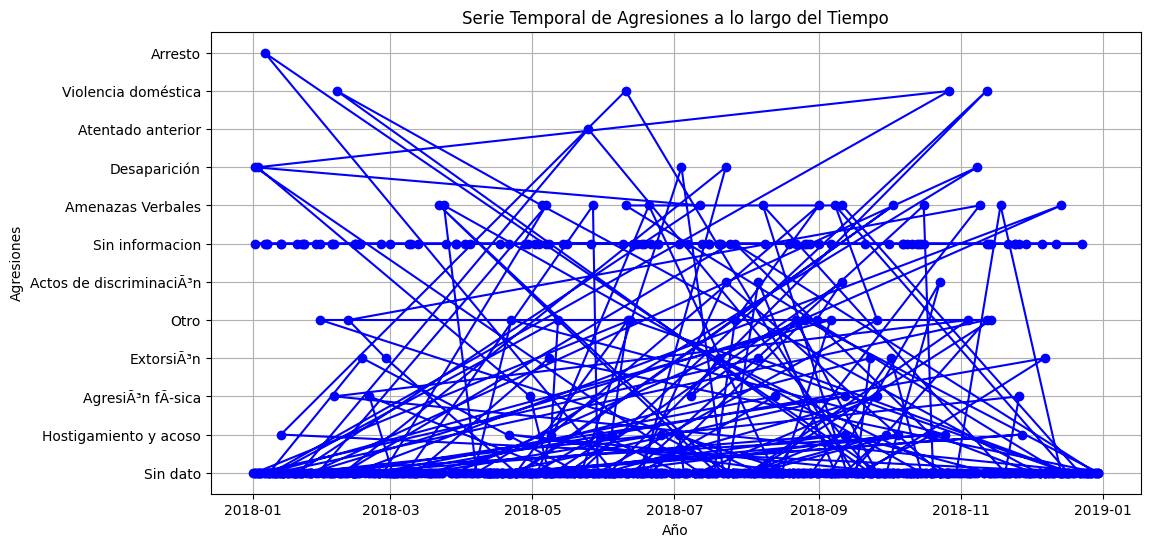

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que la columna 'Año' esté en formato de fecha
#df['Fecha'] = pd.to_datetime(df['Fecha'], format='%Y')

# Configura el 'Año' como índice del DataFrame
#df.set_index('Fecha', inplace=True)

# Visualiza la serie temporal de crímenes
plt.figure(figsize=(12, 6))
plt.plot(df['Agresiones'], marker='o', linestyle='-', color='b')
plt.title('Serie Temporal de Agresiones a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Agresiones')
plt.grid(True)
plt.show()


In [ ]:
df.columns

Index(['Género', 'Edad', 'Ocupación', 'Agresiones', 'Tipo Crimen'], dtype='object')